# Linear models
Following _Introduction to Machine Learning with Python_  [Chapter 2 Supervised Learning](https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb) Section 2.3.3 Linear Models for classification (p.58)

Linear models take a **linear** combination of features to predict the target. If the target is a continuous variable, we use _regression_, e.g. `LinearRegression()` in Scikit-learn. If the target is categorical (binary, or multivalued), we use _classification_, e.g. `LogisticRegression()` in Scikit-learn.

Linear models are often a good baseline.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

## Linear models for classification

In a two-dimensional binary classification problem, the linear model for classification as a line as a decision boundary:

$\hat{y} = w[0]\cdot x[0] + w[1]\cdot x[1] + b > 0$

There are two columns in the feature matrix `X`, we have two weights `w` and one intercept `b`.

In [7]:
import mglearn

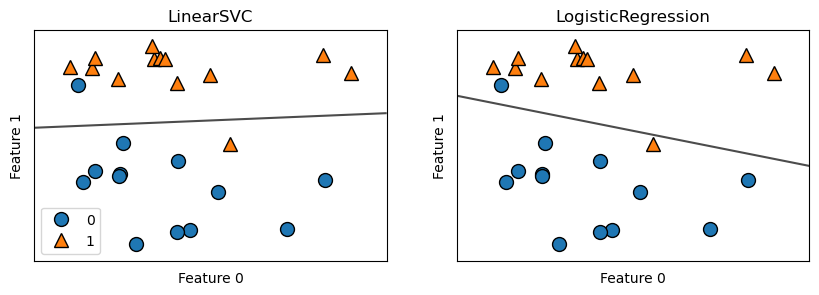

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In linear classification, the target categories are separated with a line (plane or hyperplane), such that the separation is *optimal*.

For `LogisticRegression()` the decision boundary is achieved by passing the linear model to a sigmoid function. We  maximize the log-likelihood. See: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

For `LinearSVC()` the decision boundary is achieved by values of the linear model being $>+1$ for *true* labels and $<-1$ for *negative* labels. The solution for the weights are found with constraint optimizaion. See: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

Note that both, support vector machine (LinearSVC) and logistic regression use $l_2$ regularization per default.

The parameter that controls regularization is `C`. Default is `C=1.0`. It behaves inversly to `alpha` for linear regression:
- **Higher** values of `C` result in **less** regularization.
- **Lower** values of `C` result in **more** regularization.

This is because in the objective function, `C` multiplies the loss-function part, rather than the regularization part. See for example https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

We can see the effect of `C` on the `LinearSVC` classifier.

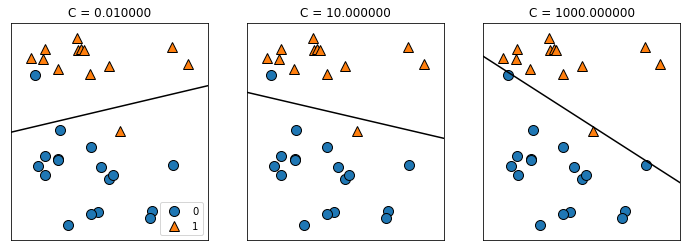

In [4]:
mglearn.plots.plot_linear_svc_regularization()

We can create a similar plot for `LogisticRegression()`

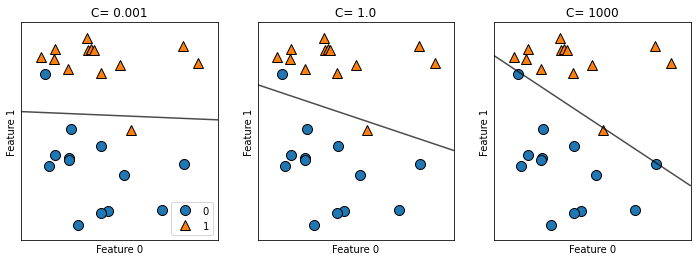

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for model, ax in zip([LogisticRegression(C=0.001), LogisticRegression(), LogisticRegression(C=1000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C= {}".format(clf.C))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend();

> When you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

>There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. 

### A more complex dataset - Breast cancer 

In [6]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()


**Question:** How would we learn more about the dataset?

Train `LogisticRegression()` model.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Validation set score: {:.3f}".format(logreg.score(X_val, y_val)))

Training set score: 0.958
Validation set score: 0.958


With a default value of `C=1.0` we have high/low variance, we are/are not overfitting.

Let's try a more simple/complex model. We need more/less regularization and higher/lower `C`.

In [8]:
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Validation set score: {:.3f}".format(logreg100.score(X_val, y_val)))

Training set score: 0.981
Validation set score: 0.965


Variance increased, and validation score is now higher. We like that.

Let's try a less simple/complex model. We need more/less regularization and higher/lower `C`.

In [9]:
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Validation set score: {:.3f}".format(logreg001.score(X_val, y_val)))

Training set score: 0.953
Validation set score: 0.951


Result is a lower validation score, we make more errors, and have higher bias. We are underfitting.

Let's have a look at the magnitudes of the coeficients. We expect higher values with more/less regularization.

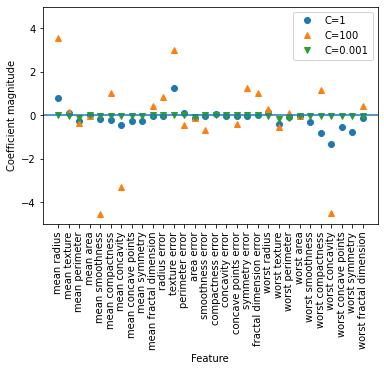

In [10]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

### $l_1$ regularization 

As in linear regression, we can use $l_1$ regularization instead of $l_2$ regularization with `LogisticRegression()`. We expect some of the features to have zero weights. The model becomes more sparse.

Training accuracy of l1 logreg with C=0.001: 0.91
Validation accuracy of l1 logreg with C=0.001: 0.92


/Users/pauc/miniconda3/envs/ensf-ml/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of l1 logreg with C=1.000: 0.96
Validation accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Validation accuracy of l1 logreg with C=100.000: 0.98


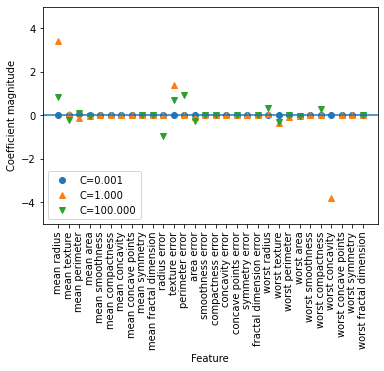

In [11]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Validation accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_val, y_val)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear models for multi-class classification 

In general, any binary classifier can be used for multi-class classification using a *one-versus-rest* approach.

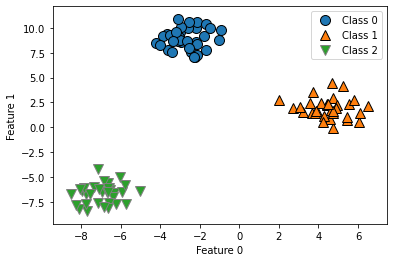

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### One-vs.-rest in support vector machine classifier 

In [13]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


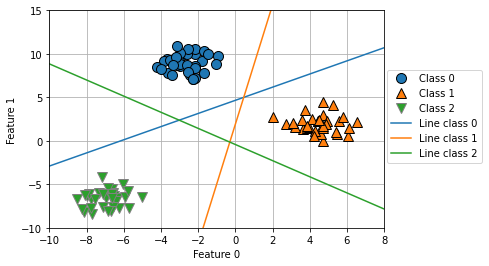

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['C0', 'C1', 'C2']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.grid(True)

**Question:** How would the sample with feature0=0, feature1=0 we classified?

**Question:** How would the sample with feature0=0, feature1=-1 we classified?

**Question:** How would the sample with feature0=-1, feature1=0 we classified?

### One-vs.-rest with logistic regression

In [15]:
logreg = LogisticRegression(multi_class='ovr').fit(X, y)
print("Coefficient shape: ", logreg.coef_.shape)
print("Intercept shape: ", logreg.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


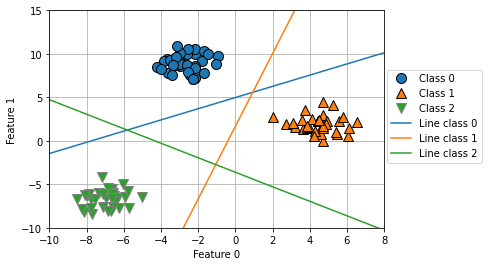

In [16]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logreg.coef_, logreg.intercept_,
                                  ['C0', 'C1', 'C2']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.grid(True)

**Question:** How would the sample with feature0=0, feature1=0 we classified?

**Question:** How would the sample with feature0=0, feature1=-1 we classified?

**Question:** How would the sample with feature0=-1, feature1=0 we classified?